In [1]:
# Relevant imports
import mogreps
import netCDF4
from pathlib import Path

In [2]:
year = 2013
month = 6
day = 15
hour = 3
realization = 0
forecast_period = 3
f = mogreps.download_data(
    'mogreps-uk',
    mogreps.make_data_object_name('mogreps-uk', year, month, day, hour, realization, forecast_period),
    data_folder=Path('.'))
data_set = netCDF4.Dataset(f)

File prods_op_mogreps-uk_20130615_03_00_003.nc already exists.


In [3]:
from matplotlib import pyplot as plt

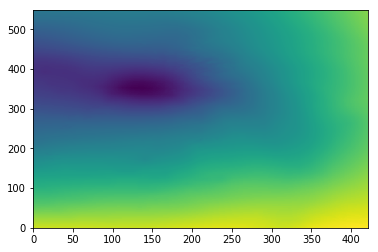

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(data_set.variables['air_pressure_at_sea_level'][0])
plt.show()

In [7]:
import cartopy.crs as ccrs

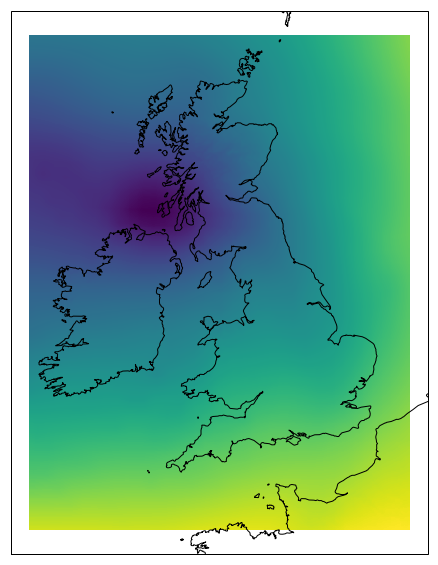

In [9]:
rotation = data_set['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude,
                             pole_latitude=rotation.grid_north_pole_latitude)
projection = transform

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'],
                    data_set['grid_latitude'],
                    data_set['air_pressure_at_sea_level'][0],
                    transform=transform)
ax.coastlines(resolution='10m')
plt.show()

In [32]:
data_set['air_pressure_at_sea_level']

<class 'netCDF4._netCDF4.Variable'>
float32 air_pressure_at_sea_level(time, grid_latitude, grid_longitude)
    _FillValue: -1073741800.0
    standard_name: air_pressure_at_sea_level
    units: Pa
    um_stash_source: m01s16i222
    grid_mapping: rotated_latitude_longitude
    coordinates: forecast_period forecast_reference_time
unlimited dimensions: time
current shape = (4, 548, 421)
filling on

In [26]:
cube = iris.load(str(f))

/home/thomasgibson/miniconda3/envs/motr/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'grid_latitude_0' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/thomasgibson/miniconda3/envs/motr/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'grid_longitude_0' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/thomasgibson/miniconda3/envs/motr/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/thomasgibson/miniconda3/envs/motr/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'pressure_0' dimension

In [28]:
cube

[<iris 'Cube' of cloud_area_fraction_assuming_maximum_random_overlap / (1) (time: 4; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas / (kft) (time: 4; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of wet_bulb_potential_temperature / (K) (time: 4; pressure: 3; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of stratiform_snowfall_rate / (kg m-2 s-1) (time: 36; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of wet_bulb_freezing_level_altitude / (m) (time: 3; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of air_pressure_at_sea_level / (Pa) (time: 4; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of air_temperature / (K) (time: 4; pressure: 2; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of air_temperature / (K) (time: 3; grid_latitude: 548; grid_longitude: 421)>,
<iris 'Cube' of air_temperature / (K) (time: 4; grid_latitude: 548; grid_lo